In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime as dt
import math

In [76]:
symbol = 'FPT' # VCB, VIC, HPG, VNM, FPT
date_milestone = '2021-01-01'

In [77]:
url = f'https://raw.githubusercontent.com/bachbnt/learn-stock_prediction-python/dev/data/{symbol}.csv'
dataset_all = pd.read_csv(url)
dataset_all.head()

,Date,Open,High,Low,Close,Volume
0,2015-01-05,11997.7,12047.7,11897.7,11947.7,835215
1,2015-01-06,11872.7,12022.7,11822.7,12022.7,1111534
2,2015-01-07,12022.7,12272.6,12022.7,12097.7,1238274
3,2015-01-08,12072.7,12097.7,11947.7,11972.7,694003
4,2015-01-09,11972.7,12122.7,11972.7,12072.7,977680


In [78]:
dataset_train = dataset_all[dataset_all['Date'] < date_milestone]
dataset_test = dataset_all[dataset_all['Date'] >= date_milestone]

In [79]:
training_set = dataset_train.iloc[:, 1:2].values
test_set = dataset_test.iloc[:, 1:2].values

In [80]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [81]:
X_train = []
y_train = []
for i in range(60, len(dataset_train)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [82]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense 

In [ ]:
model = Sequential()

model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')

model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100


In [69]:
dataset_total = pd.concat((dataset_train['Close'], dataset_test['Close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_set = model.predict(X_test)
predicted_set = sc.inverse_transform(predicted_set)

real_price = test_set.flatten()
predicted_price = predicted_set.flatten()

[ 96398  98125  99523 101333 102567 102814 103636 102155 101826 102567
 101826 102155 102649 102155 102402 103965 107008 106597 106268 104705
 105034 105528 109200 108900 109300 108000 107300 107000 108000 106900
 106700 107000 107100 107400 107500 107400 107700 106200 106400 106700
 110000 110500 109600 107400 106900 108000 107600 107700 108000 108800
 108800 108800 107500 107500 107000 107400 107100 107600 109400 109700
 110900 110600 109600 110500 109900 109800 108200 109700 109000 109500
 109000 110000 109200 109700 112000 112600 113400 111200 111600 110400
 110400 111000 109900 110200 108700 109000 108700 109200 108800 108800
 109300 110800 109800 110400 112000 115900 116300 114500 113100 113900
 113300 107700 109000 110300 108700 108200 106700 103300  96100 102800
 102700 106400 109700 108800 109600 105300 108000 108700 109000 108000
 107500 107000 105800 104600 104800 105600 104900 104500 103400 103000
 102200 100500 101100 102800 102200 102200 101000 100500 102500 101700
 10080

In [70]:
# Root Mean Square Error - RMSE
total = 0
n = len(real_price)
for i in range(n):
  total += math.pow(real_price[i] - predicted_price[i], 2)
rmse = math.sqrt(total/n)

# 5.3526*1000
# 1119.8980646153511
print(rmse)

1121.477025942849


In [71]:
# Mean Absolute Error - MAE
total = 0
n = len(real_price)
for i in range(n):
  total += abs(real_price[i] - predicted_price[i])
mae = total/n

# 4.0268*1000
# 885.3326075819674
print(mae)

772.6760281968391


In [72]:
# Mean Absolute Percent Error MAPE
total = 0
n = len(real_price)
for i in range(n):
  total += abs(real_price[i] - predicted_price[i])/real_price[i]
mape = total/n

# 0.0168
# 0.027457068357071884
print(mape)

0.008341629723224244


In [73]:
# Average Return - AR
total = 0
n = len(real_price)
for i in range(n - 1):
  if(predicted_price[i+1] > predicted_price[i]):
    total += real_price[i+1] - real_price[i]
ar = total/(n-1)

# -0.9632876712328429
print(ar)

139.76945244956772


In [74]:
# Average Return Taxes Fees - ARTF
total = 0
n = len(real_price)
for i in range(n - 1):
  if(predicted_price[i+1] > predicted_price[i]):
    tax_fee = real_price[i]*0.0015 + real_price[i+1]*0.0015 + real_price[i+1]*0.001
    total += real_price[i+1] - real_price[i] - tax_fee
artf = total/(n-1)

# -66.13681150684927
print(artf)

-16.206484149855907


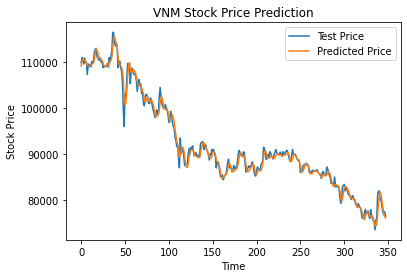

In [75]:
# plt.plot(training_set, label = 'Training Price')
plt.plot(test_set, label = 'Test Price')
plt.plot(predicted_set, label = 'Predicted Price')
plt.title(f'{symbol} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
# bổ sung thuế phí trong công thức tính lợi nhuận
# chạy sai số trên tập train => so sánh với tập test => overfit or underfit

In [ ]:
# Average Return - AR
# Thuế phí
total = 0
n = len(real_price)
for i in range(n - 1):
  if(predicted_price[i+1] > predicted_price[i]):
    tax_fee = real_price[i]*0.0015 + real_price[i+1]*0.0015 + real_price[i+1]*0.001
    total += real_price[i+1] - real_price[i] - tax_fee
ar = total/(n-1)

# -66.13681150684927
print(ar)

-66.13681150684927


In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[0:len(dataset_total) - len(dataset_test) + 60].values
print(inputs)
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_train = []
for i in range(60, len(inputs)):
    X_train.append(inputs[i-60:i, 0])
X_train = np.array(X_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
predicted_set = model.predict(X_train)
predicted_set = sc.inverse_transform(predicted_set)

real_price = training_set.flatten()
predicted_price = predicted_set.flatten()

print(real_price.size)
print(predicted_price.size)

[ 4738.7  4781.8  4781.8 ... 25896.6 26203.3 27206.8]
48/48 [==============================] - 1s 29ms/step
1519
1519


In [ ]:
# Root Mean Square Error - RMSE
total = 0
n = len(real_price)
for i in range(n):
  total += math.pow(real_price[i] - predicted_price[i], 2)
rmse = math.sqrt(total/n)
print(rmse) # 2195.258106239992

# Mean Absolute Error - MAE
total = 0
n = len(real_price)
for i in range(n):
  total += abs(real_price[i] - predicted_price[i])
mae = total/n
print(mae) # 1496.0358359542136

# Mean Absolute Percent Error MAPE
total = 0
n = len(real_price)
for i in range(n):
  total += abs(real_price[i] - predicted_price[i])/real_price[i]
mape = total/n
print(mape) # 0.1576353579783943

2195.258106239992
1496.0358359542136
0.1576353579783943


In [ ]:
# => overfit
# giảm số lớp
# giảm số epoch